In [228]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [229]:
# Read in dataset
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## EDA

In [230]:
df.shape

(101766, 50)

### DF describe

In [231]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


### DF object describe

In [232]:
df_object = df.select_dtypes(include=['object_'])
df_object.describe().transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,101766,4,None,96420


The dataset has a total of 101,766 records with 49 variables with the target variables named 'readmitted'.  Two of those 49 variables are identifiers.

Use the code below to see unique values with their count in each column.
*The team commented the code out because long length of the output.* 

In [233]:
# for col in df:
#     print(col)
#     print(df[col].value_counts())

### Missing Values and Data Imputations
Seems like all missing values have been coded as '?'.  Let's replace all '?' with Nan then count missing value in all columns.

### Read "?" values as na

In [234]:
# Replace '?' with Nan
# df = pd.read_csv(r"https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/diabetic_data.csv", na_values='?')
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%202/Data/mapped_diabetes.csv", na_values='?')


c:\Users\OaklandHillsMansion\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Check class imbalance

In [235]:
df_gb = df.groupby("was_readmitted")["readmitted"].count().reset_index(name="target_count")
df_gb["percent"] = df_gb.target_count/df_gb.target_count.sum() * 100
df_gb

,was_readmitted,target_count,percent
0,0,90409,88.840084
1,1,11357,11.159916


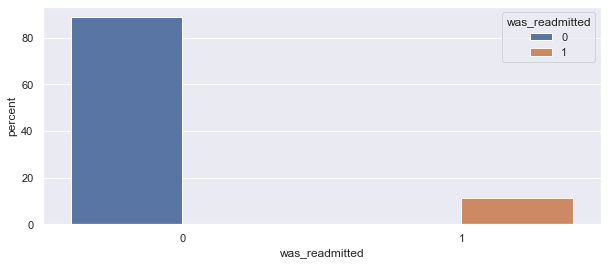

In [236]:
plt.figure(figsize=(10,4))
sns.barplot(x="was_readmitted", y="percent", hue="was_readmitted", data=df_gb)
plt.show()

<AxesSubplot:>

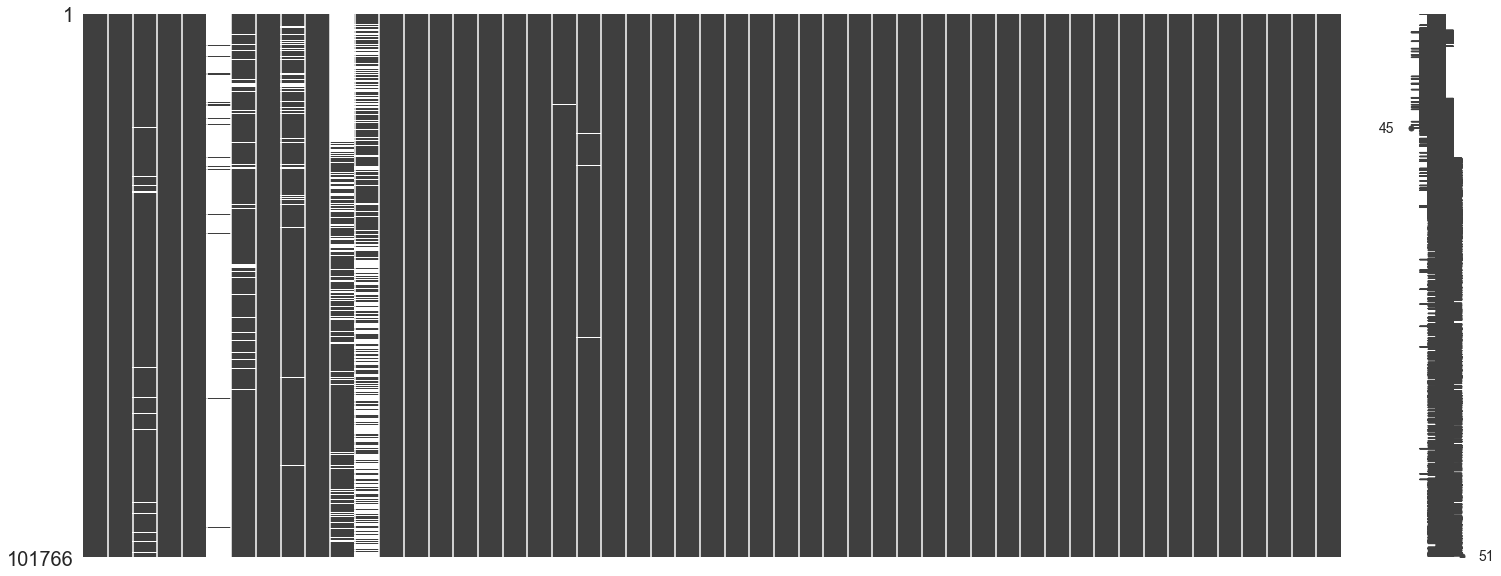

In [237]:
msno.matrix(df)

### df_na

In [238]:
# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na

,count,percent_missing
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
admission_source_id,6781,0.066633
admission_type_id,5105,0.050164
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
discharge_disposition_id,14,0.000138


Seven variables have missing values as shown in the table above.
- **weight** has 98,569 missing values, which equal to about 97% missing.
- **medical_specialty** has about 49% missing values.
- **payer_code** has about 40% missing value.
- **race** and **diag_3** have alittle above 2% and 1% missing values, respectively.
- **diag_2** and **diag_1** have less than 1% missing values. 

Run Pearson Correlations to see if other columns have strong correlation with these 7 variables and can be helpful to fill in missing values.

### Check correlation for missing features

In [239]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr = df_corr[['weight', 'medical_specialty', 'payer_code', 'race', 'diag_3', 'diag_2', 'diag_1']]
df_corr = df_corr.abs()
df_corr.style.background_gradient(cmap='Blues')

,weight,medical_specialty,payer_code,race,diag_3,diag_2,diag_1
encounter_id,0.009245,0.013884,0.369888,0.028370,0.068818,0.109559,0.040695
patient_nbr,0.003434,0.018978,0.364582,0.026747,0.070654,0.111112,0.049278
race,0.054619,0.002744,0.012574,1.000000,0.003335,0.004511,0.017456
gender,0.010623,0.014953,0.034695,0.033583,0.016728,0.008582,0.015656
age,0.007005,0.046885,0.180412,0.140272,0.058892,0.062124,0.059949
weight,1.000000,0.038246,0.032643,0.054619,0.020492,0.033069,0.002529
admission_type_id,0.008962,0.260968,0.115856,0.028269,0.002386,0.035539,0.003533
discharge_disposition_id,0.027869,0.025451,0.093008,0.001324,0.006275,0.002238,0.013209
admission_source_id,0.001394,0.075583,0.030930,0.003431,0.012278,0.001092,0.029678
time_in_hospital,0.019221,0.003048,0.058149,0.005376,0.017085,0.023193,0.005379


#### **weight**
From the correlation table above, **weight** does not seem to have strong correlation with any other columns.  With 97% missing values, we decided to drop weight variable from the dataset due to unreliability. 

In [240]:
df_impute = df

df_impute.drop(columns=['weight'], axis=1, inplace=True)

#### **medical_specialty**
**medical_specialty** has the strongest correlation with admission_type_id.  Let's look at the correlation between each value of **medical_specialty** with admission_type_is to see if admission_type_id can be helpful for missing value imputating for the column.

<AxesSubplot:>

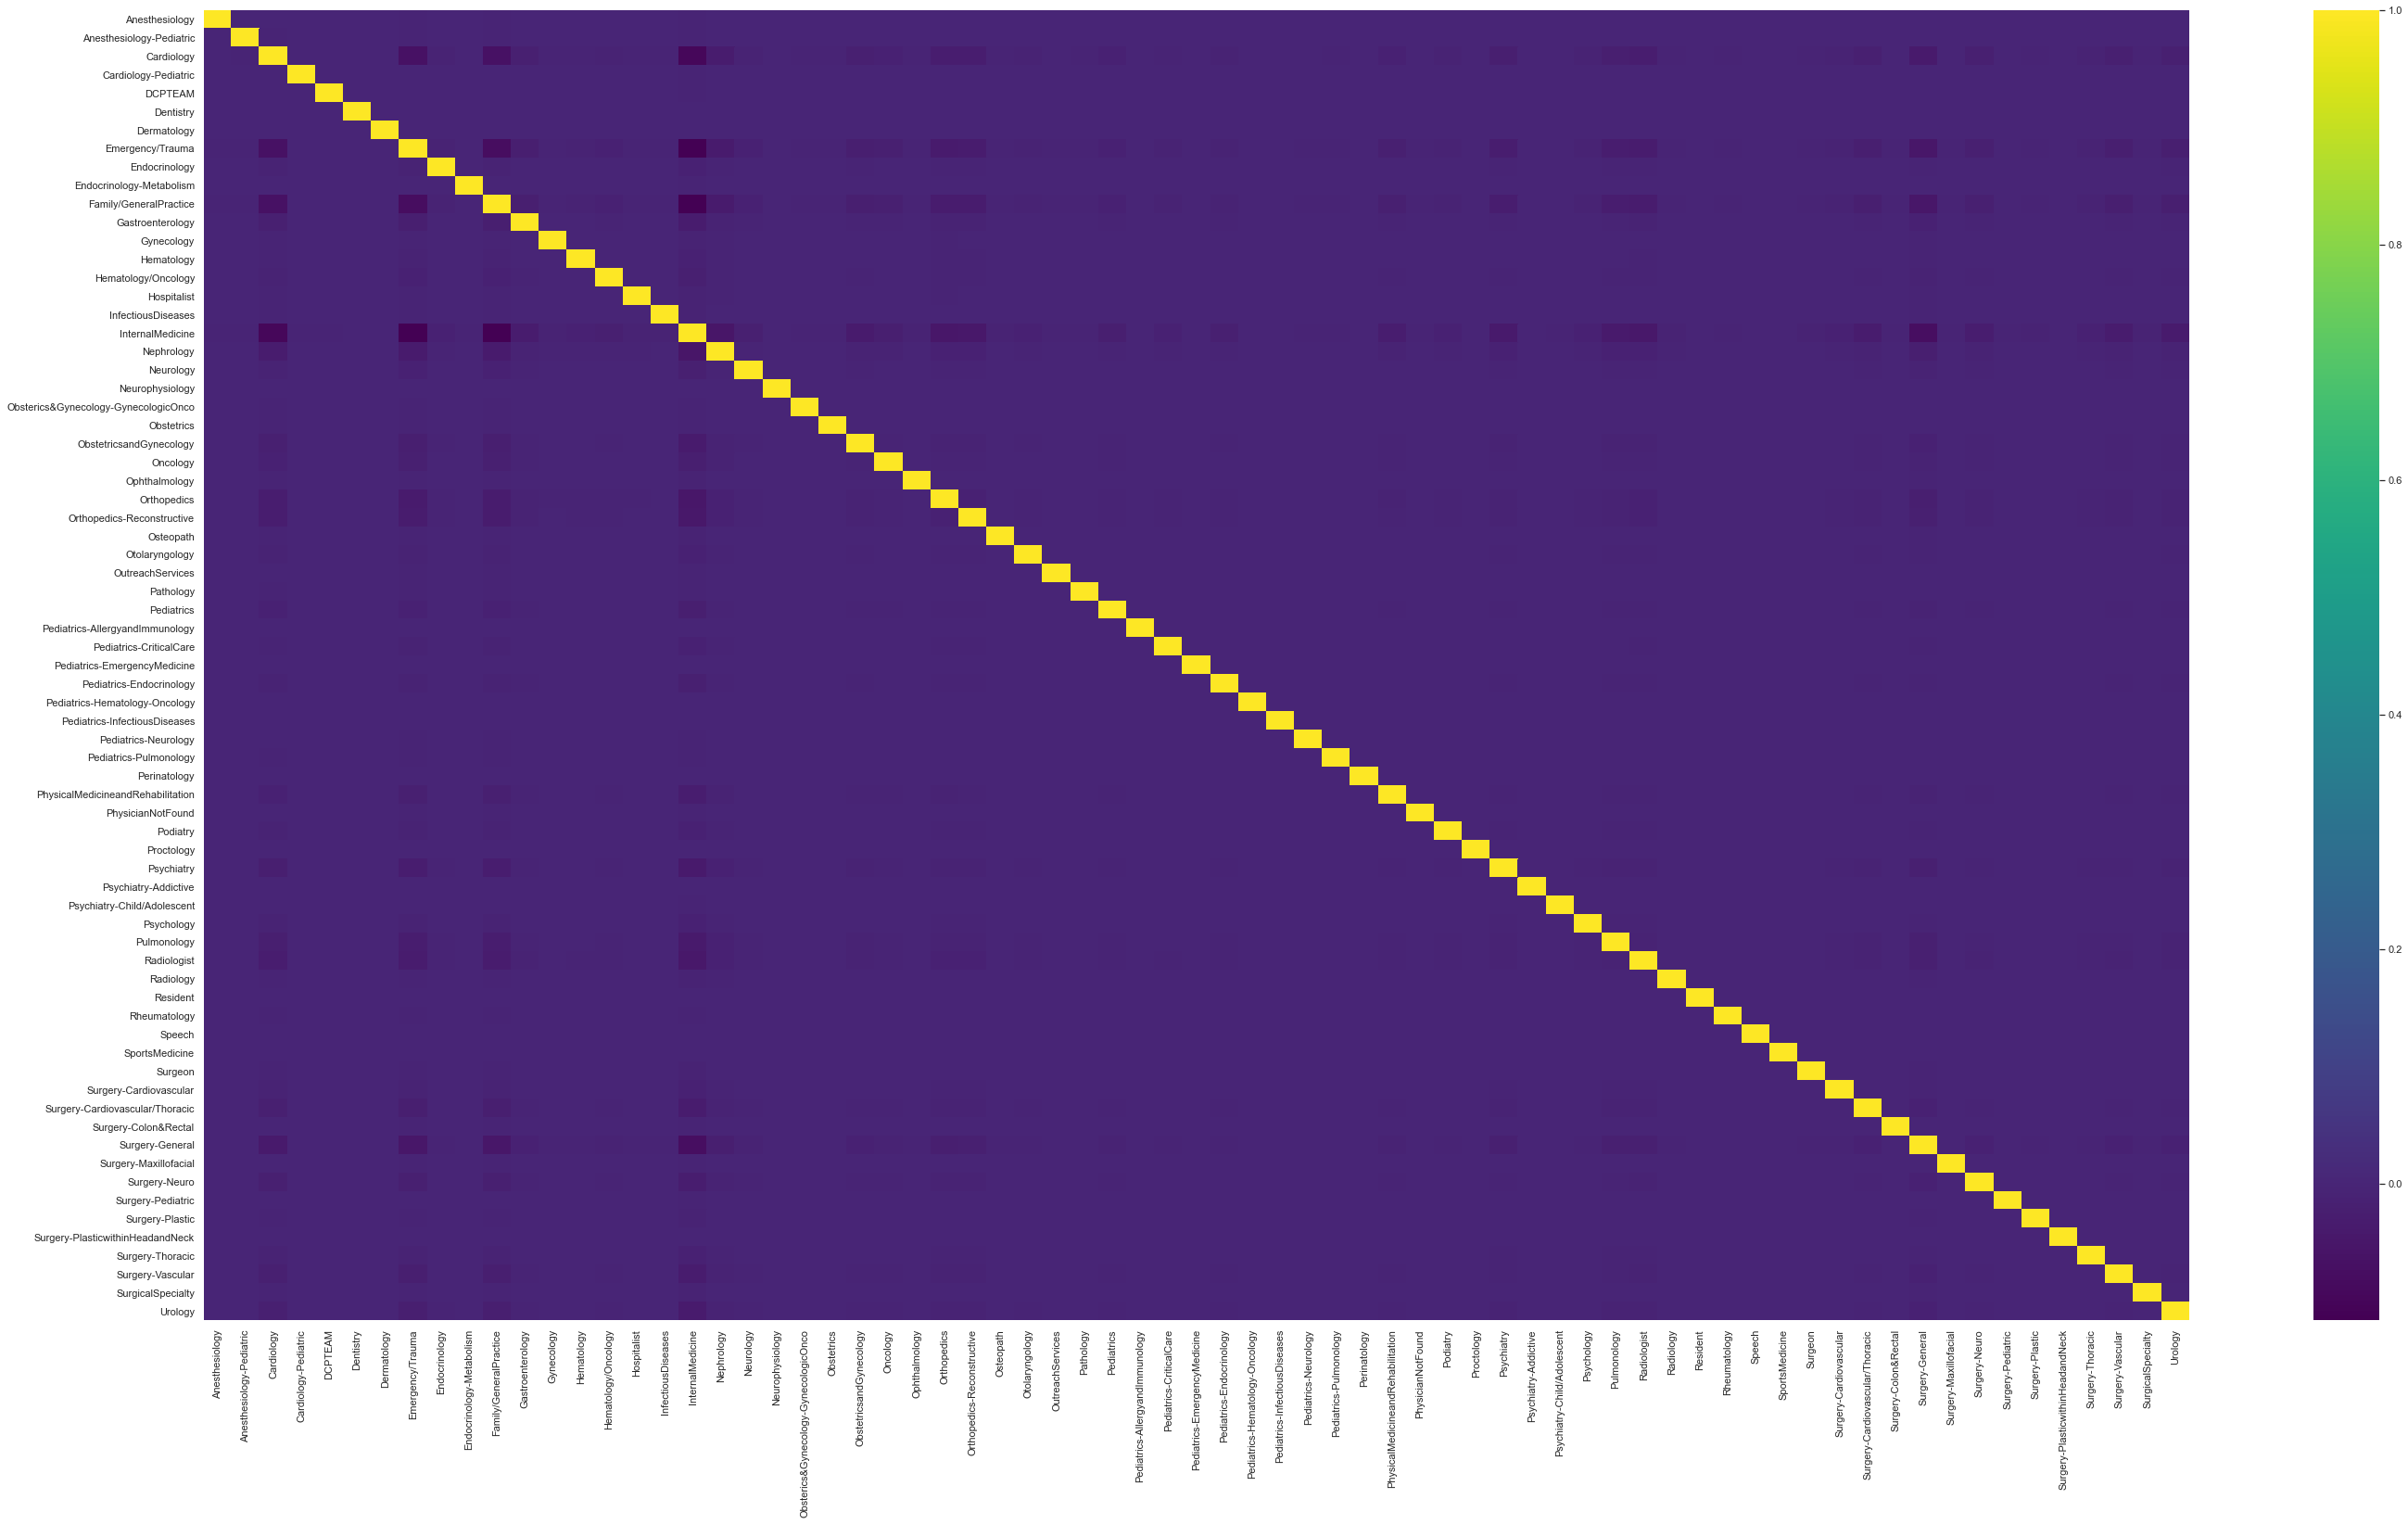

In [241]:
med_spec = df[['medical_specialty', 'admission_type_id']]

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(med_spec['medical_specialty'],drop_first=True)

#dropping original columns
med_spec_df = med_spec.drop('medical_specialty',axis=1)

#concating dummies to the data frame
med_spec_df = pd.concat([med_spec_df, dummies],axis=1)

plt.figure(figsize=(48,26))
sns.heatmap(med_spec_df.corr(), annot=False, cmap='viridis')

With all 73 different values (including missing value) within **medical_specialty**, there is no stong correlation with admission_type_id.  The team decided to fill the **medical_specialty** with 'NA' to preserve the existing values.

In [242]:
df_impute.medical_specialty = df_impute.medical_specialty.fillna('NA')

#### **payer_code**

First, let look at the count for all exists values in the column.

In [243]:
print(df['payer_code'].value_counts())

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


Without considering encounter_id and patient_nbr, which are unique identifiers for each patient, **payer_code** has the strongest correlation at 0.180 with age. Let's look at the correlation between each value of **payer_code** with age to see if age can be helpful for missing value imputating for the column.

<AxesSubplot:xlabel='age', ylabel='payer_code'>

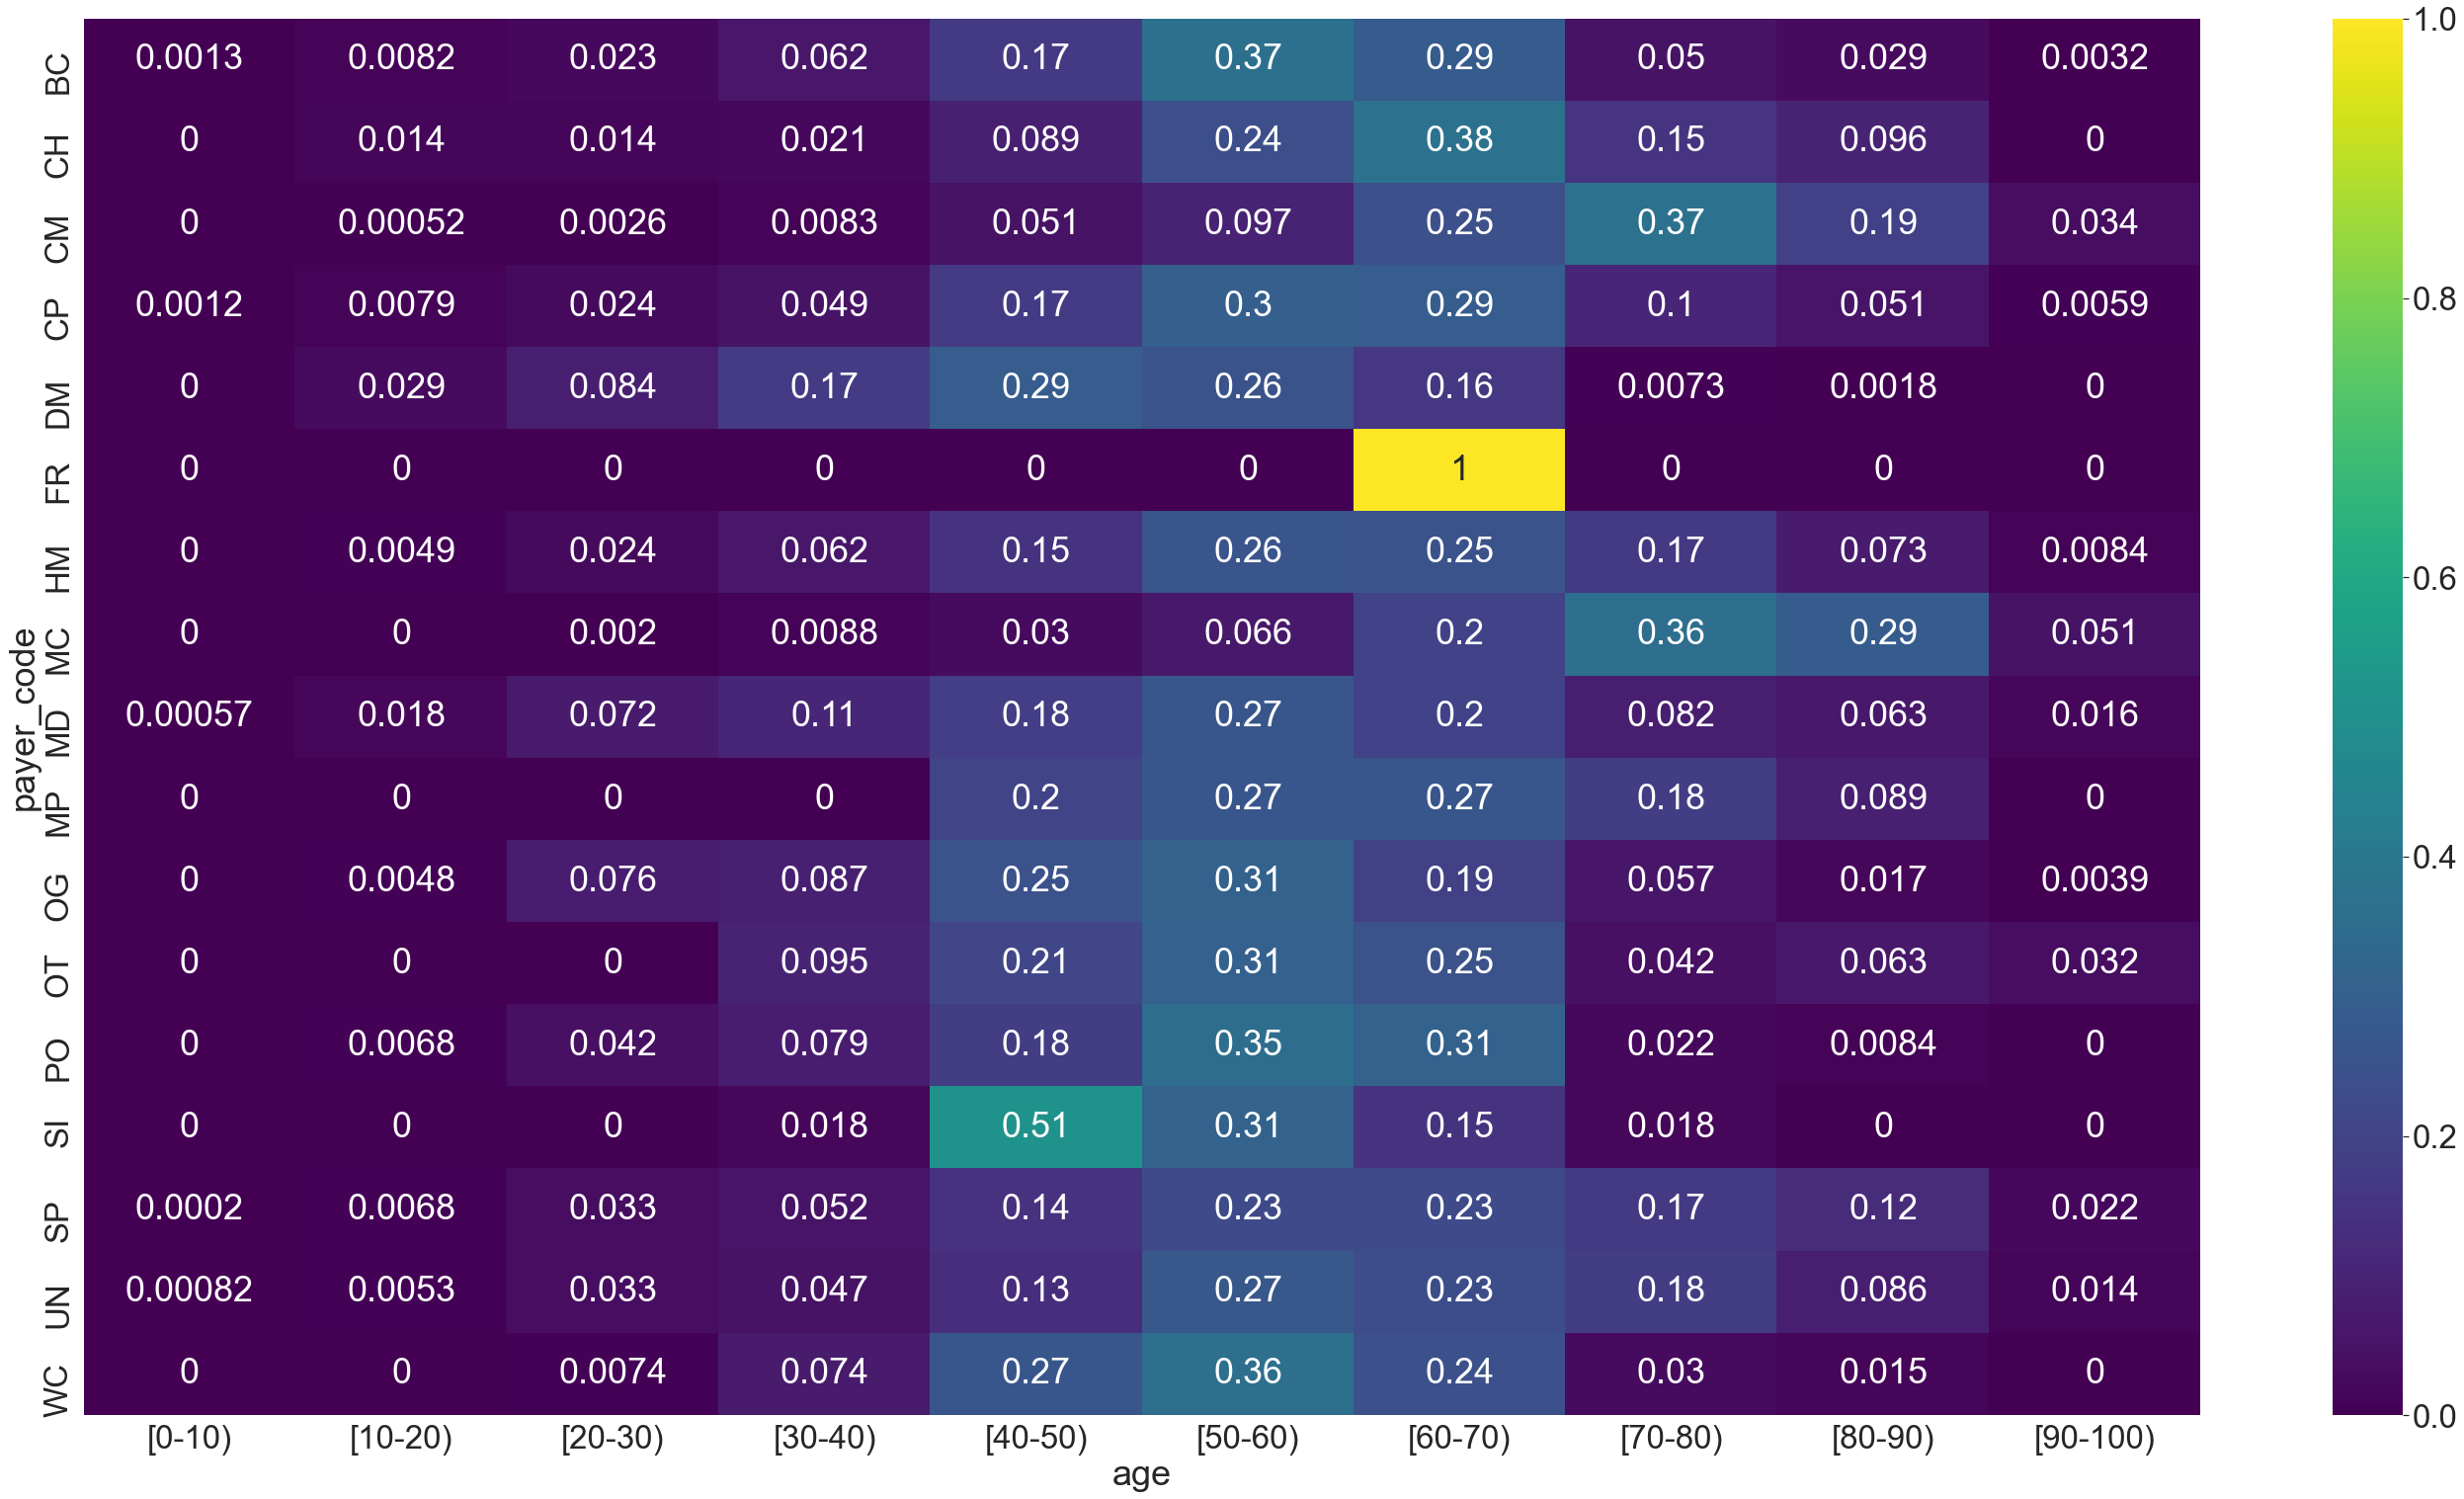

In [244]:
payer_code_vs_age = pd.DataFrame(pd.crosstab(df['payer_code'], df['age'], normalize='index'))

plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(payer_code_vs_age,annot=True,cmap='viridis')

There is no strong correlation relationship between each value of **payer_code** and age.  It will not be reasonable to use age to help imputing the missing values for the column.

To impute the missing value with the most occurance count which is 'MC' is also not reasonable.  There is 32,439 'MC' appears in the columns which is less than the missing values of 40,256.

The team decided to fill the **payer_code** with 'NA' to preserve the existing values.

In [245]:
df_impute.payer_code = df_impute.payer_code.fillna('NA')

#### **race**

First, let's look at the count for each value in the column.

In [246]:
print(df['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Evenif, **race** has the strongest correlation at 0.125 with age, the missing values for **race** are not disproportionately from range of age, or even other category value.

The team decided to fill in the **race** NaN's with a new category of 'Not Identify'.

In [247]:
df_impute.race = df_impute.race.fillna('Not Identify')

#### **diag_1, diag_1, and diag_3**

**diag_1, diag_1, and diag_3** are correlated with each other at about *only* 0.09 - 0.11 and do not have strong correlation with any other variables in the dataset.

The team decided to fill the **diag_1, diag_1, and diag_3** with 'NA' to preserve the existing values.

In [248]:
df_impute.diag_1 = df_impute.diag_1.fillna('NA')
df_impute.diag_2 = df_impute.diag_2.fillna('NA')
df_impute.diag_3 = df_impute.diag_3.fillna('NA')

In [249]:
df_impute.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


# Model Preperations

### Target Variable - **readmitted**

There are 3 unique values in the **readmitted** target variable as shown below:

In [250]:
df_impute['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Our objective is to predict if a patient will re-admit at the hospital within 30 days of the initial admitted. Let's change all values with '<30' to 1 for possitive case of re-admit and 0 for others values for negative case of re-admit.

In [251]:
df_model = df_impute

binary_target = {
        'NO':0,
        '>30':0,
        '<30':1
}

df_model["readmitted"] = df_model["readmitted"].map(binary_target)
df_model["readmitted"].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

### Categorical Variables

Let's look at our categorical variables again to see if some variables needed to be adjust before applying one-hot-coding.

In [252]:
df_object = df_model.select_dtypes(include=['object_'])
df_object.describe().transpose()

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
admission_type_id,96661,6,Urgent,53990
discharge_disposition_id,101752,25,Discharged/transferred to another short term h...,60234
admission_source_id,94985,16,Emergency Room,57494
payer_code,101766,18,NA,40256
medical_specialty,101766,73,NA,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752


**medical_specialty, diag_1, diag_1, and diag_3** has 73, 717, 749, and 790 unique values, respectively. These will be complicated for Logistic Regression model that the team planned to use for this prediction.

Therefore, to reduce the complication of one-hot-coding, we groupped the values in each column that appear <1% of the dataset (1,018 records) as 'Others'. 

In [253]:
df_model.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,was_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,...,No,No,No,No,No,No,No,No,0,0
1,149190,55629189,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,...,Up,No,No,No,No,No,Ch,Yes,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,No,No,No,No,No,No,No,Yes,0,0
3,500364,82442376,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Up,No,No,No,No,No,Ch,Yes,0,0
4,16680,42519267,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,...,Steady,No,No,No,No,No,Ch,Yes,0,0


### medical_specialty top 35 values

<AxesSubplot:title={'center':'medical_specialty top 35 values'}, xlabel='medical_specialty', ylabel='percent'>

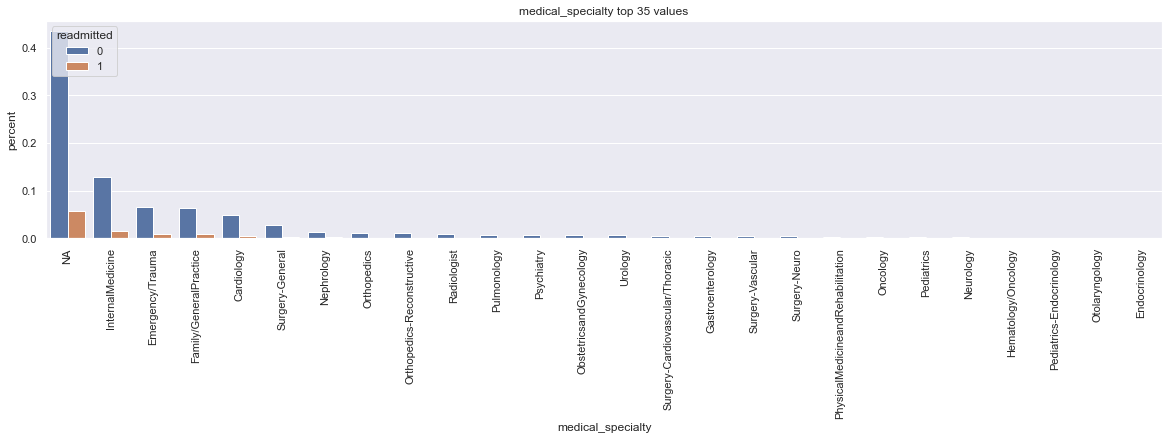

In [254]:
cat_value = "medical_specialty"

df_gb = df_model.groupby(["readmitted", cat_value])["encounter_id"].count().reset_index(name="var_count")
df_gb["percent"] = df_gb["var_count"]/df_gb.var_count.sum()

plt.figure(figsize=(20,4))
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.title(cat_value + " top 35 values")
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, "percent"), hue='readmitted')

### diag_1 top 35 values

<AxesSubplot:title={'center':'diag_1 top 35 values'}, xlabel='diag_1', ylabel='percent'>

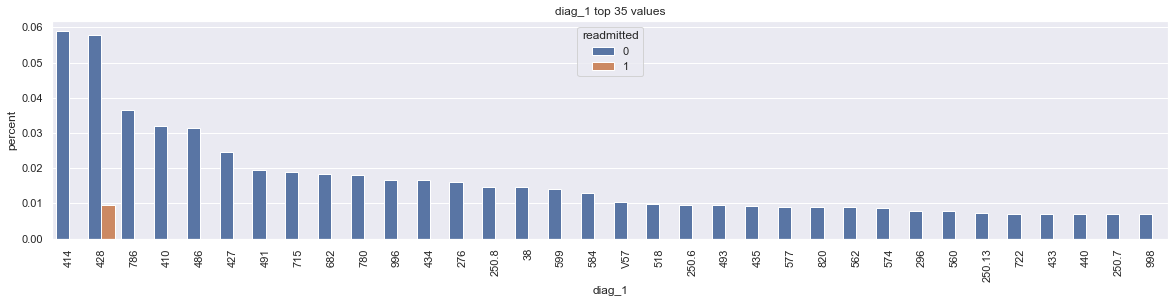

In [255]:
cat_value = "diag_1"

df_gb = df_model.groupby(["readmitted", cat_value])["encounter_id"].count().reset_index(name="var_count")
df_gb["percent"] = df_gb["var_count"]/df_gb.var_count.sum()

plt.figure(figsize=(20,4))
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.title(cat_value + " top 35 values")
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, "percent"), hue='readmitted')

### diag_2 top 35 values

<AxesSubplot:title={'center':'diag_2 top 35 values'}, xlabel='diag_2', ylabel='percent'>

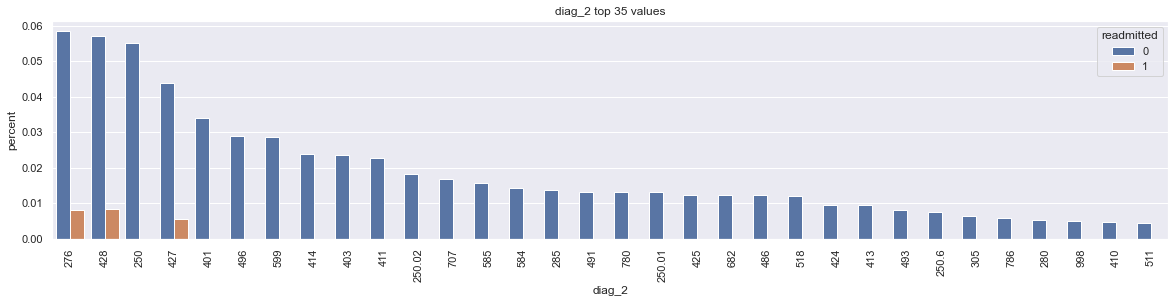

In [256]:
cat_value = "diag_2"

df_gb = df_model.groupby(["readmitted", cat_value])["encounter_id"].count().reset_index(name="var_count")
df_gb["percent"] = df_gb["var_count"]/df_gb.var_count.sum()

plt.figure(figsize=(20,4))
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.title(cat_value + " top 35 values")
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, "percent"), hue='readmitted')

### diag_3 top 35 values

<AxesSubplot:title={'center':'diag_3 top 35 values'}, xlabel='diag_3', ylabel='percent'>

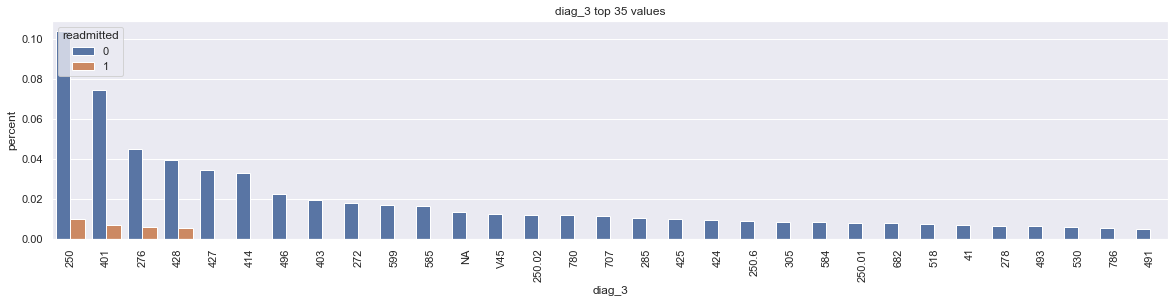

In [257]:
cat_value = "diag_3"

df_gb = df_model.groupby(["readmitted", cat_value])["encounter_id"].count().reset_index(name="var_count")
df_gb["percent"] = df_gb["var_count"]/df_gb.var_count.sum()

plt.figure(figsize=(20,4))
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.title(cat_value + " top 35 values")
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, "percent"), hue='readmitted')

In [258]:
print(df_object['medical_specialty'].unique())

['Pediatrics-Endocrinology' 'NA' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDisease

In [259]:
def major(cols):
    x = df_model.groupby(by=cols, as_index=False).agg({'encounter_id': pd.Series.nunique})
    x.rename(columns={x.columns[0]: 'val', x.columns[1]: 'count'}, inplace = True)
    x['percent_appears'] = x['count']/df_model.shape[0]
    x = x[x['percent_appears'] > .01]
    row_to_list = x['val'].to_list()
    return row_to_list

medical_specialty_major = major(df_model['medical_specialty'])
df_model['medical_specialty_reduced'] = np.where(~df_model['medical_specialty'].isin(medical_specialty_major), "Others", df_model['medical_specialty'])
df_model['cardio-specialty'] = np.where(df_model['medical_specialty'].str.contains('(?i)Cardio'), "1", "0")
df_model['pulmonology-specialty'] = np.where(df_model['medical_specialty'].str.contains('(?i)Pulmonology'), "1", "0")
df_model['infection-specialty'] = np.where(df_model['medical_specialty'].str.contains('(?i)InfectiousDiseases'), "1", "0")

# df_model.drop(columns=['medical_specialty'], axis=1, inplace=True)

diag1_major = major(df_model['diag_1'])
df_model['diag_1_reduced'] = np.where(~df_model['diag_1'].isin(diag1_major), "Others", df_model['diag_1'])
df_model.drop(columns=['diag_1'], axis=1, inplace=True)

diag2_major = major(df_model['diag_2'])
df_model['diag_2_reduced'] = np.where(~df_model['diag_2'].isin(diag2_major), "Others", df_model['diag_2'])
df_model.drop(columns=['diag_2'], axis=1, inplace=True)

diag3_major = major(df_model['diag_3'])
df_model['diag_3_reduced'] = np.where(~df_model['diag_3'].isin(diag3_major), "Others", df_model['diag_3'])
df_model.drop(columns=['diag_3'], axis=1, inplace=True)

In [260]:
df_model.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,diabetesMed,readmitted,was_readmitted,medical_specialty_reduced,cardio-specialty,pulmonology-specialty,infection-specialty,diag_1_reduced,diag_2_reduced,diag_3_reduced
0,2278392,8222157,Caucasian,Female,[0-10),Trauma Center,Unknown/Invalid,Physician Referral,1,NA,...,No,0,0,Others,0,0,0,Others,Others,NA
1,149190,55629189,Caucasian,Female,[10-20),Urgent,Discharged/transferred to another short term h...,Emergency Room,3,NA,...,Yes,0,0,NA,0,0,0,276,250.01,Others
2,64410,86047875,AfricanAmerican,Female,[20-30),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Yes,0,0,NA,0,0,0,Others,250,Others
3,500364,82442376,Caucasian,Male,[30-40),Urgent,Discharged/transferred to another short term h...,Emergency Room,2,NA,...,Yes,0,0,NA,0,0,0,Others,Others,403
4,16680,42519267,Caucasian,Male,[40-50),Urgent,Discharged/transferred to another short term h...,Emergency Room,1,NA,...,Yes,0,0,NA,0,0,0,Others,Others,250


### Age vs readmitted %

<AxesSubplot:title={'center':'age top 35 values'}, xlabel='age', ylabel='percent'>

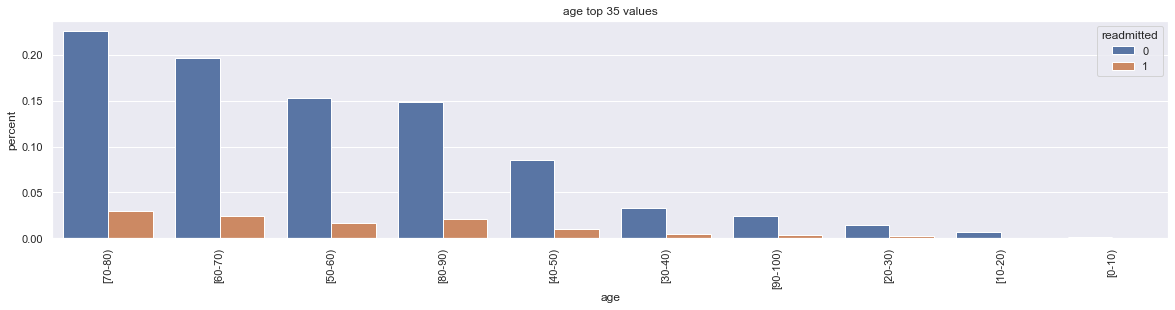

In [261]:
cat_value = "age"

df_gb = df_model.groupby(["readmitted", cat_value])["encounter_id"].count().reset_index(name="var_count")
df_gb["percent"] = df_gb["var_count"]/df_gb.var_count.sum()

plt.figure(figsize=(20,4))
sns.set(font_scale=1)
plt.xticks(rotation=90)
plt.title(cat_value + " top 35 values")
sns.barplot(x=cat_value, y="percent", data=df_gb.nlargest(35, "percent"), hue='readmitted')

In [262]:
ages_excluded = ["[0-10)", "[10-20)", "[20-30)", "[30-40)"]
print(df_model.shape)
df_model = df_model[~df_model.age.isin(ages_excluded)]

(101766, 54)


## One-hot Encode
One-hot encode categorical variables then drop originals.

In [263]:
# df_object = df_model.select_dtypes(include=['object_'])

# Categoricals_to_convert = list(df_object)

# # using pd get dummies for the category columns we are keeping
# dummies = pd.get_dummies(df_model[Categoricals_to_convert],drop_first=True)

# #dropping original columns
# df_model = df_model.drop(Categoricals_to_convert,axis=1)

# #concating dummies to the data frame
# df_model = pd.concat([df_model,dummies],axis=1)

# df_model.head()

In [264]:
df_model.shape

(95482, 54)

# Model

In [265]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_valid_index in split.split(df_model, df_model.readmitted):
    diabetes_train = df_model.iloc[train_index]
    diabetes_holdout = df_model.iloc[test_valid_index]

In [266]:
print("Size of modeling set (to be CV split): ", diabetes_train.shape)
print("Size of hold back validation set: ", diabetes_holdout.shape)

Size of modeling set (to be CV split):  (85933, 54)
Size of hold back validation set:  (9549, 54)


In [267]:
diabetes_train.to_csv("train_set.csv", index=False)
diabetes_holdout.to_csv("holdout_set.csv", index=False)

In [268]:
# #Create new X predictor matrix
# X_host = diabetes_train.drop(['readmitted'],axis=1).values #droping target
# y_host = diabetes_train['readmitted'].values
# y_host = y_host.astype(int)

# #Scale new predictor matrix
# from sklearn.preprocessing import StandardScaler
# scl_obj = StandardScaler()
# scl_obj.fit(X_host)
# X_host = scl_obj.transform(X_host)

In [269]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import StratifiedKFold


# num_cv_iterations = 5 #Change to 10 fold for final optimization (longer compute time)
# #num_instances = len(y_host)
# cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

In [270]:
# #Create new X predictor matrix
# X_host_validate = diabetes_holdout.drop(['readmitted'],axis=1).values #droping target
# y_host_validate = diabetes_holdout['readmitted'].values
# y_host_validate = y_host_validate.astype(int)

# #Scale new predictor matrix
# from sklearn.preprocessing import StandardScaler
# scl_obj = StandardScaler()
# scl_obj.fit(X_host_validate)
# X_host_validate = scl_obj.transform(X_host_validate)

In [271]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

# scorer = {
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score, average = 'macro'),
#     'recall': make_scorer(recall_score, average = 'macro')
# }

In [272]:
# import sklearn
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_validate

# #lr does not have weights applied
# lr = LogisticRegression(penalty='l1', C=1, class_weight=None, solver='saga', max_iter=100) # get object

# cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise") #lr does not have weights applied
# print(cv_results)
# print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
# print("Mean Precision = ",cv_results['test_precision'].mean())
# print("Mean Recall = ",cv_results['test_recall'].mean())
